# Лабораторна робота №6     
# Застосування numpy

## Завдання 1
#### 1. Генерація даних

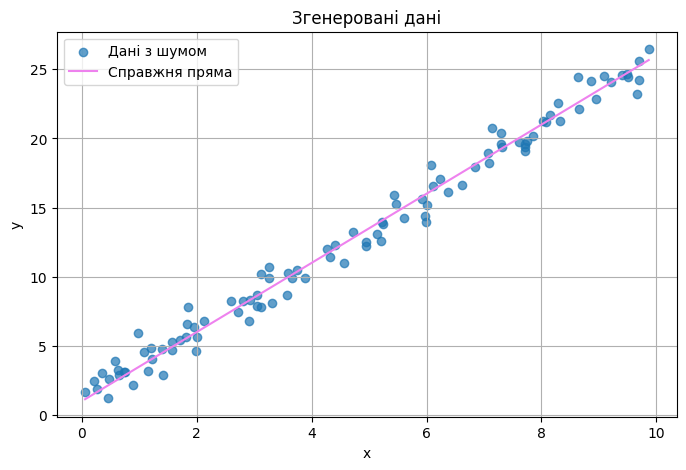

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 100
x = np.random.uniform(0, 10, n)
true_k = 2.5
true_b = 1.0
noise = np.random.normal(0, 1, n)
y = true_k * x + true_b + noise

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Дані з шумом', alpha=0.7)
plt.plot(np.sort(x), true_k * np.sort(x) + true_b, color='violet', label='Справжня пряма')
plt.title('Згенеровані дані')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Метод найменших квадратів (Least Squares)

In [16]:
def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    k = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - k * x_mean
    return k, b

k_ls, b_ls = least_squares(x, y)
print(f"Метод найменших квадратів: k = {k_ls:.4f}, b = {b_ls:.4f}")


Метод найменших квадратів: k = 2.4540, b = 1.2151


####  3. Використання np.polyfit

In [8]:
k_np, b_np = np.polyfit(x, y, 1)
print(f"np.polyfit: k = {k_np:.4f}, b = {b_np:.4f}")


np.polyfit: k = 2.4540, b = 1.2151


#### 4. Побудова порівняльного графіка

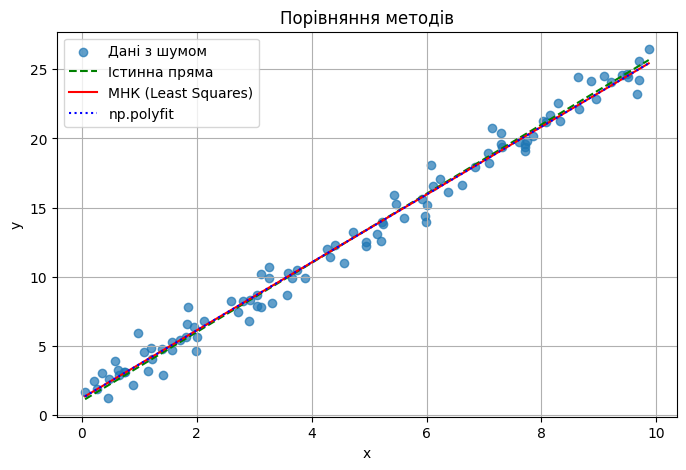

In [17]:
# Побудова порівняльного графіка
x_sorted = np.sort(x)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Дані з шумом', alpha=0.7)
plt.plot(x_sorted, true_k * x_sorted + true_b, 'g--', label='Істинна пряма')
plt.plot(x_sorted, k_ls * x_sorted + b_ls, 'r-', label='МНК (Least Squares)')
plt.plot(x_sorted, k_np * x_sorted + b_np, 'b:', label='np.polyfit')
plt.title('Порівняння методів')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Завдання 2
#### 1. Градієнтний спуск

In [18]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k = 0.0
    b = 0.0
    n = len(x)
    errors = []

    for i in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred
        mse = np.mean(error ** 2)
        errors.append(mse)

        k_grad = -2 * np.mean(x * error)
        b_grad = -2 * np.mean(error)

        k -= learning_rate * k_grad
        b -= learning_rate * b_grad

    return k, b, errors

k_gd, b_gd, errors = gradient_descent(x, y)
print(f"Градієнтний спуск: k = {k_gd:.4f}, b = {b_gd:.4f}")


Градієнтний спуск: k = 2.4545, b = 1.2120


#### 2. Порівняльна візуалізація ліній

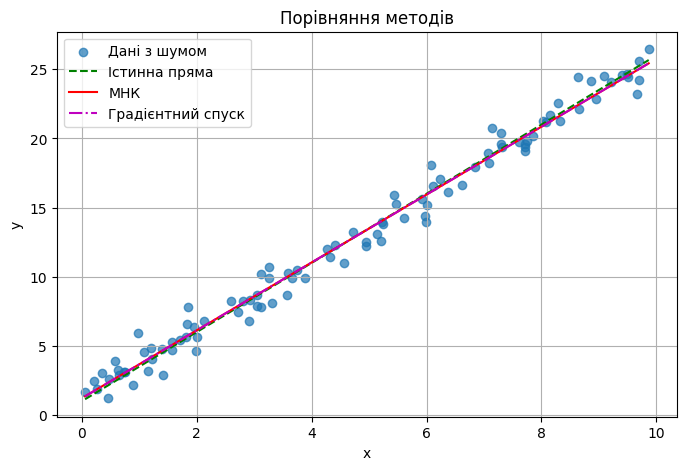

In [19]:
# Порівняльний графік з градієнтним спуском
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Дані з шумом', alpha=0.7)
plt.plot(x_sorted, true_k * x_sorted + true_b, 'g--', label='Істинна пряма')
plt.plot(x_sorted, k_ls * x_sorted + b_ls, 'r-', label='МНК')
plt.plot(x_sorted, k_gd * x_sorted + b_gd, 'm-.', label='Градієнтний спуск')
plt.title('Порівняння методів')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


#### 3. Графік зміни похибки (MSE) під час градієнтного спуску

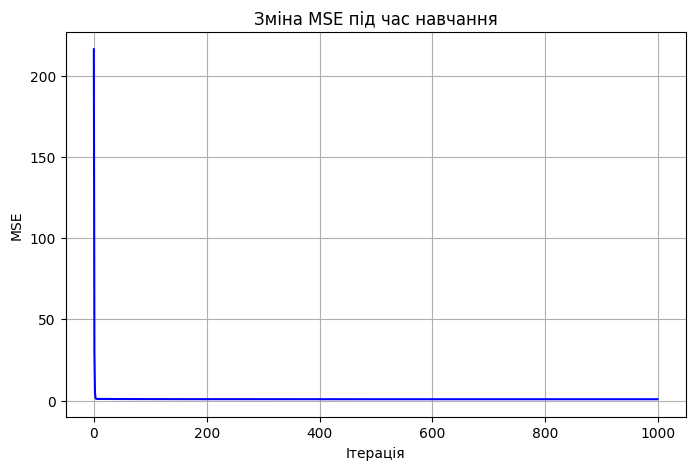

In [20]:
# Крива MSE
plt.figure(figsize=(8, 5))
plt.plot(range(len(errors)), errors, 'b-')
plt.title('Зміна MSE під час навчання')
plt.xlabel('Ітерація')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


#### 4.  Порівняння результатів

In [21]:
# Підсумок
print(f"\nІстинні параметри:     k = {true_k:.4f}, b = {true_b:.4f}")
print(f"МНК:                   k = {k_ls:.4f}, b = {b_ls:.4f}")
print(f"np.polyfit:            k = {k_np:.4f}, b = {b_np:.4f}")
print(f"Градієнтний спуск:     k = {k_gd:.4f}, b = {b_gd:.4f}")


Істинні параметри:     k = 2.5000, b = 1.0000
МНК:                   k = 2.4540, b = 1.2151
np.polyfit:            k = 2.4540, b = 1.2151
Градієнтний спуск:     k = 2.4545, b = 1.2120


# Висновки

Порівняння результатів:
- Усі три методи дали дуже схожі результати.
- Метод найменших квадратів (МНК) та np.polyfit збігаються практично повністю — це очікувано, оскільки polyfit реалізує той самий метод.
- Градієнтний спуск також наблизився до цих результатів, хоча має невелику похибку, що залежить від learning_rate і кількості ітерацій.
- Всі методи достатньо точно відновили істинні параметри (k ≈ 2.5, b ≈ 1.0), що демонструє коректність реалізації.